In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# %cd drive/MyDrive/AFCS

In [2]:
# !pip install pmdarima

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import pearsonr
import statsmodels.api as sm
from pmdarima import auto_arima
from statsmodels.tsa.statespace import exponential_smoothing
from statsmodels.tsa.seasonal import MSTL
from statsmodels.tsa.api import STLForecast

/Users/julius/repos/AFC/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [4]:
from utils import *

In [5]:
data = Data()

In [6]:
data.sales_train

,id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,FOODS_3_001_TX_3_validation,0,2,1,3,0,0,1,0,2,...,0,0,0,0,2,0,0,5,2,0
1,FOODS_3_002_TX_3_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,FOODS_3_003_TX_3_validation,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,1,0,0
3,FOODS_3_004_TX_3_validation,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
4,FOODS_3_005_TX_3_validation,0,1,1,0,0,1,2,0,0,...,0,4,2,1,1,0,1,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,FOODS_3_823_TX_3_validation,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,2,0,2
819,FOODS_3_824_TX_3_validation,0,1,0,1,0,2,0,1,1,...,0,0,0,0,0,0,0,0,0,0
820,FOODS_3_825_TX_3_validation,0,0,0,2,1,1,0,0,1,...,1,1,1,3,1,0,0,4,2,0
821,FOODS_3_826_TX_3_validation,0,0,0,0,0,0,0,0,0,...,0,2,1,1,5,3,1,2,1,2


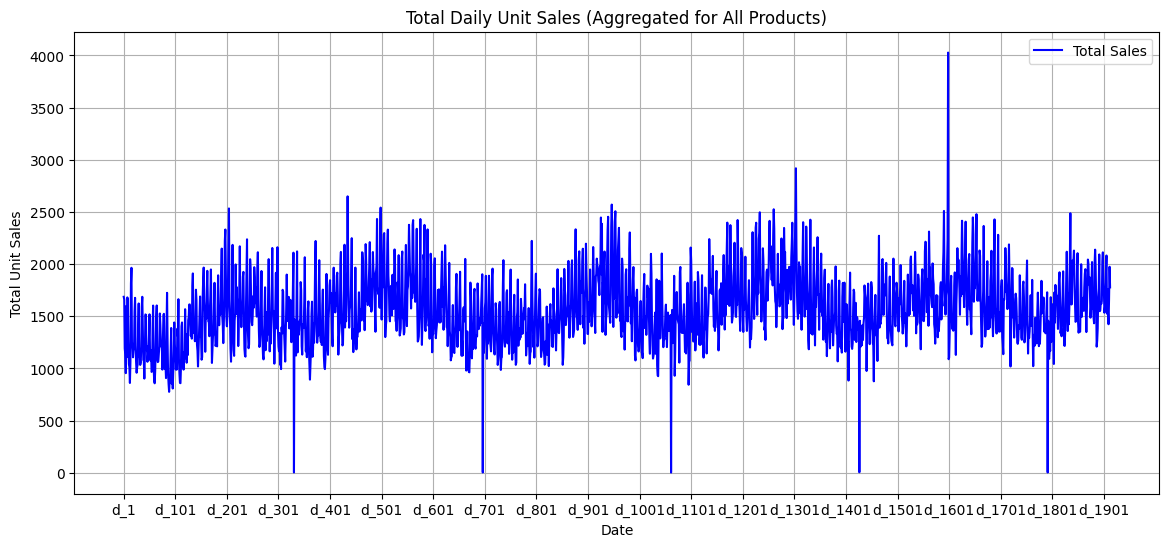

In [7]:
total_sales = data.total_sales

plt.figure(figsize=(14, 6))
plt.plot(total_sales.index, total_sales.values, label='Total Sales', color='blue')
plt.title('Total Daily Unit Sales (Aggregated for All Products)')
plt.xlabel('Date')
plt.ylabel('Total Unit Sales')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, 1913, 100))
plt.show()

In [9]:


data.merged_data

,id,day,sales,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_TX
0,FOODS_3_001_TX_3_validation,2011-01-29,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0
1,FOODS_3_002_TX_3_validation,2011-01-29,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0
2,FOODS_3_003_TX_3_validation,2011-01-29,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0
3,FOODS_3_004_TX_3_validation,2011-01-29,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0
4,FOODS_3_005_TX_3_validation,2011-01-29,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574394,FOODS_3_823_TX_3_validation,2016-04-24,2,2016-04-24,11613,Sunday,2,4,2016,NaN,NaN,NaN,NaN,0
1574395,FOODS_3_824_TX_3_validation,2016-04-24,0,2016-04-24,11613,Sunday,2,4,2016,NaN,NaN,NaN,NaN,0
1574396,FOODS_3_825_TX_3_validation,2016-04-24,0,2016-04-24,11613,Sunday,2,4,2016,NaN,NaN,NaN,NaN,0
1574397,FOODS_3_826_TX_3_validation,2016-04-24,2,2016-04-24,11613,Sunday,2,4,2016,NaN,NaN,NaN,NaN,0


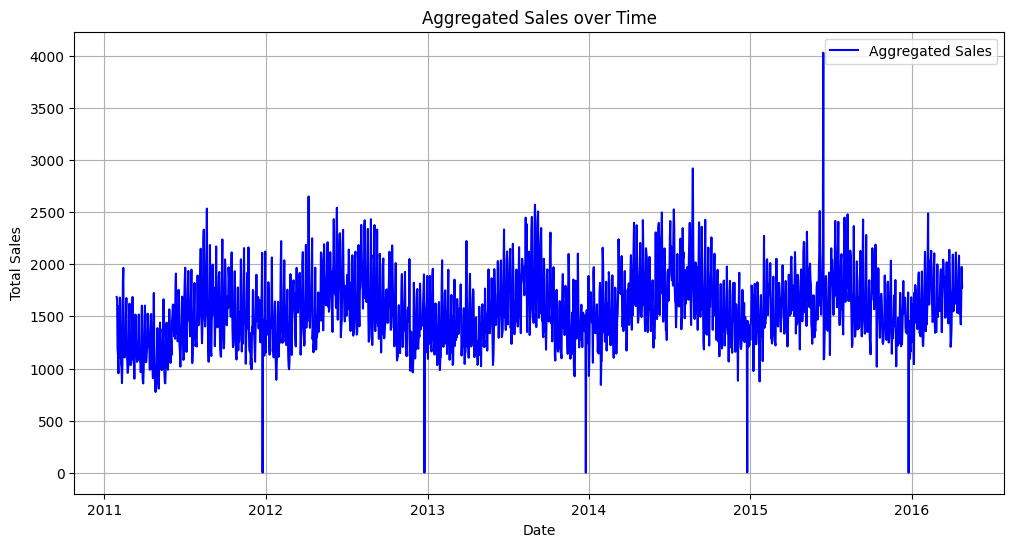

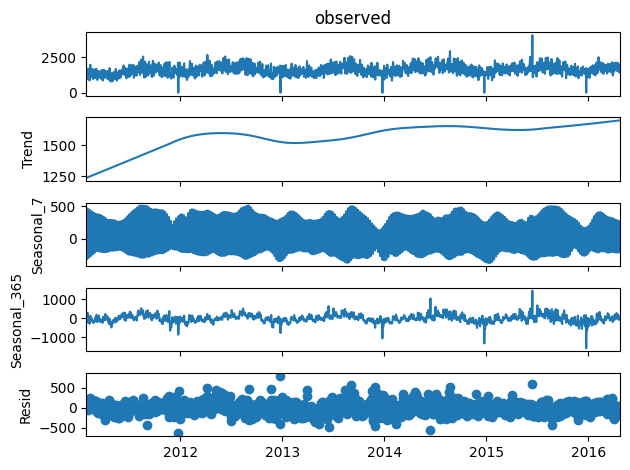

In [10]:
# now we can show sales with actual dates, day of week etc.


plt.figure(figsize=(12, 6))
plt.plot(data.daily_sales.index, data.daily_sales.values, label='Aggregated Sales', color='blue')
plt.title('Aggregated Sales over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.legend()
plt.show()

# Perform seasonal decomposition for both period 7 and period 365
mstl = MSTL(data.daily_sales, periods=[7, 365])
res = mstl.fit()
res.seasonal.head()
ax = res.plot()

# Perform seasonal decomposition
#result = seasonal_decompose(daily_sales, model='additive', period=365)

# Plot the decomposed components
#plt.figure(figsize=(12, 8))

#plt.subplot(4, 1, 1)
#plt.plot(daily_sales, label='Original')
#plt.title('Seasonal Decomposition of Aggregated Sales over Time')
#plt.legend(loc='upper left')

#plt.subplot(4, 1, 2)
#plt.plot(result.trend, label='Trend')
#plt.legend(loc='upper left')

#plt.subplot(4, 1, 3)
#plt.plot(result.seasonal, label='Seasonal')
#plt.legend(loc='upper left')

#plt.subplot(4, 1, 4)
#plt.plot(result.resid, label='Residuals')
#plt.legend(loc='upper left')

#plt.tight_layout()
#plt.show()

In [ ]:
# Calculate the ACF
acf_result = sm.tsa.acf(data.daily_sales, nlags=1500)

# Plot the ACF
plt.figure(figsize=(12, 6))
plt.stem(range(len(acf_result)), acf_result, markerfmt='bo', linefmt='b-', basefmt='r-')
plt.title('Autocorrelation Function (ACF) for Aggregated Sales')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

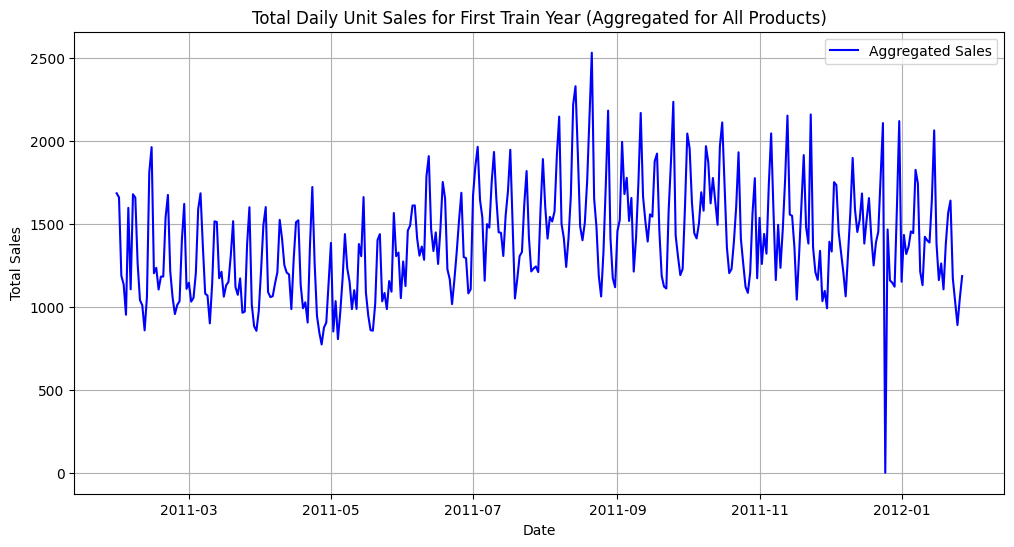

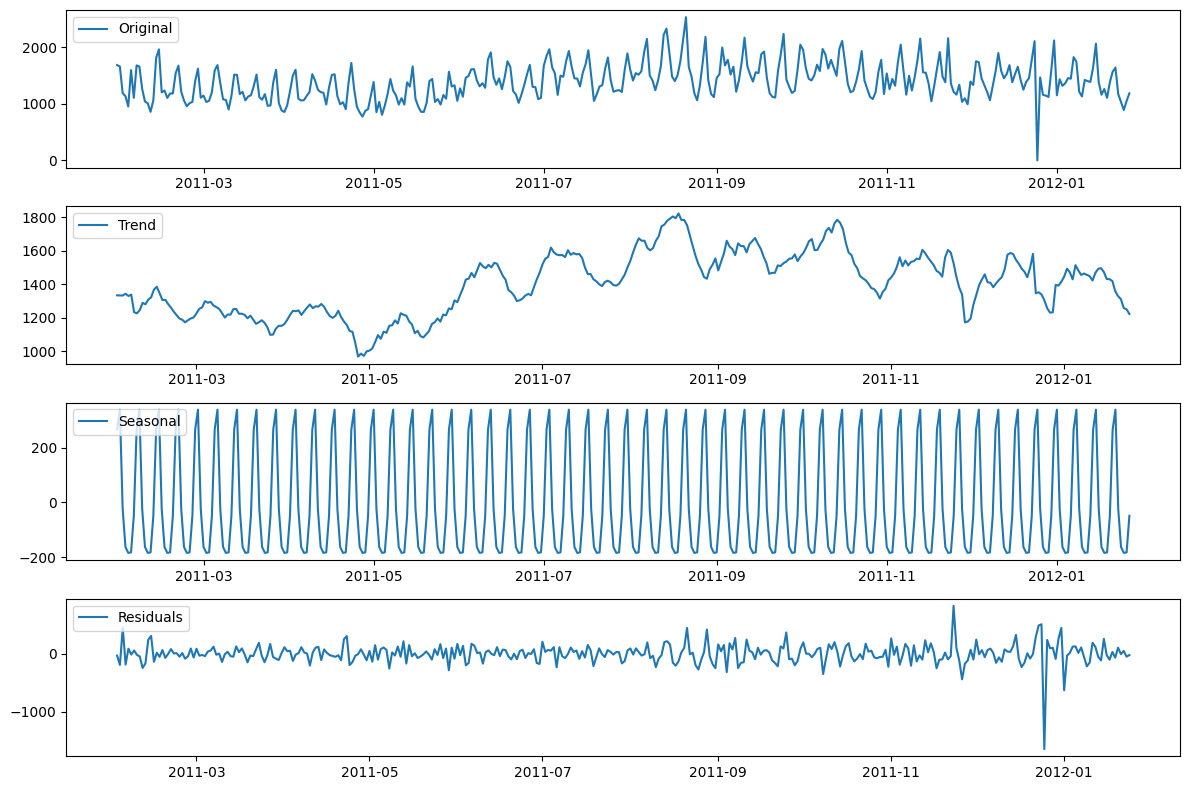

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(data.daily_sales[:364].index, data.daily_sales[:364].values, label='Aggregated Sales', color='blue')
plt.title('Total Daily Unit Sales for First Train Year (Aggregated for All Products)')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.legend()
plt.show()

# Perform seasonal decomposition
result = seasonal_decompose(data.daily_sales[:364], model='additive', period=7)

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(data.daily_sales[:364], label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# Seems like sales are very low on christmas day

print(data.daily_sales[data.daily_sales < 10].index)

print(data.daily_sales[data.daily_sales > 3000].index)

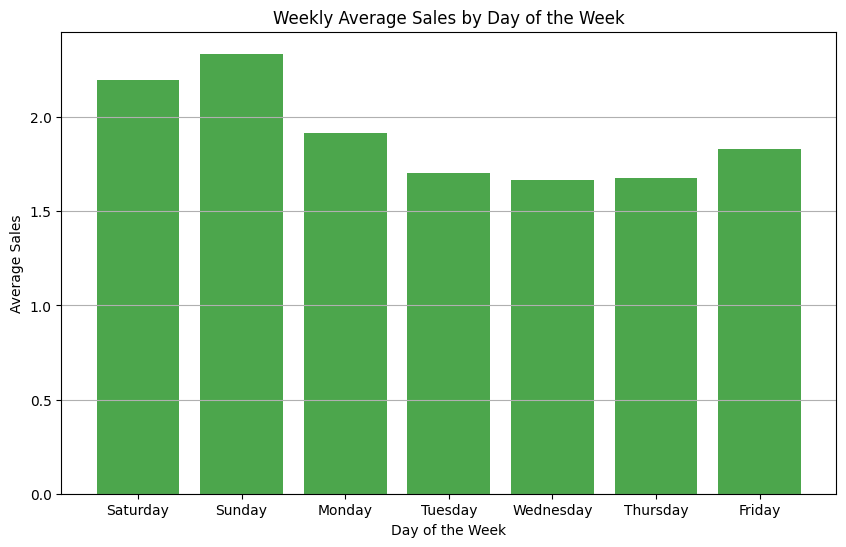

In [15]:



plt.figure(figsize=(10, 6))
plt.bar(data.weekly_avg_sales.index, data.weekly_avg_sales.values, color='green', alpha=0.7)
plt.title('Weekly Average Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')
plt.grid(axis='y')
plt.show()

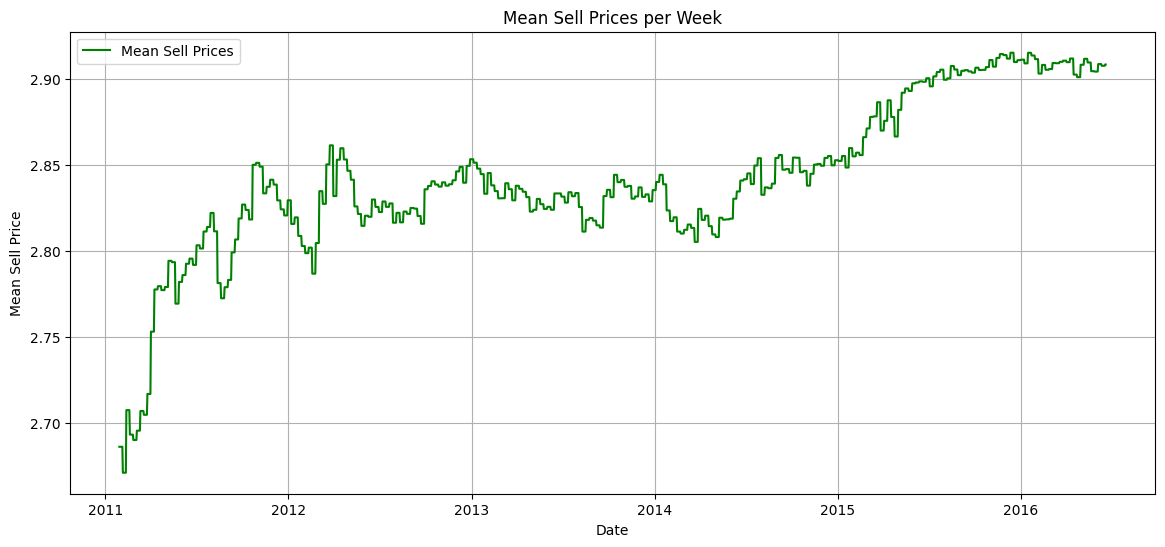

In [16]:


plt.figure(figsize=(14, 6))
plt.plot(data.mean_prices.index, data.mean_prices.values, label='Mean Sell Prices', color='green')
plt.title('Mean Sell Prices per Week')
plt.xlabel('Date')
plt.ylabel('Mean Sell Price')
plt.legend()
plt.grid(True)
plt.show()

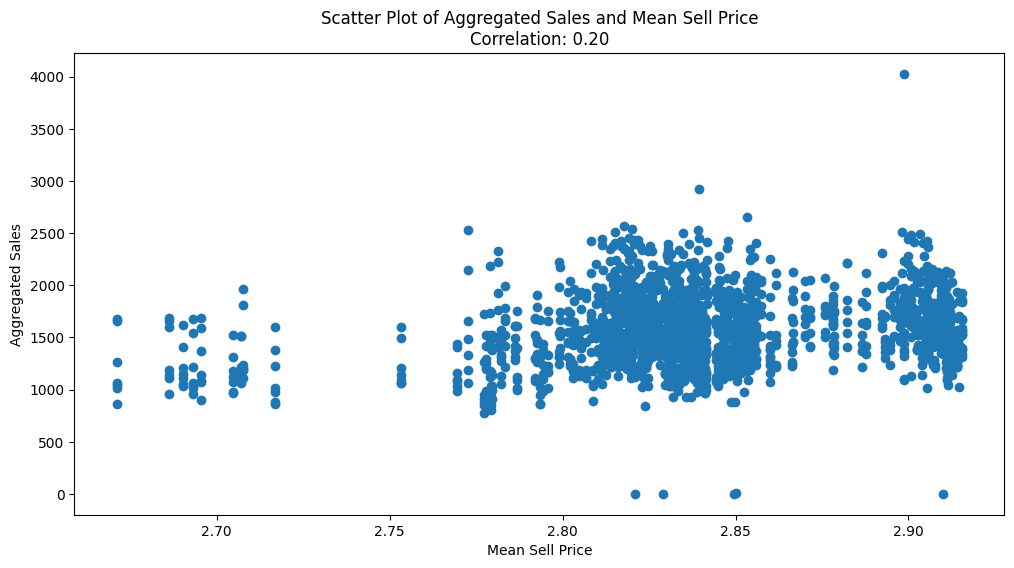

Correlation Coefficient: 0.20


In [18]:
# Merge the two DataFrames on the 'date' column

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(data.sales_sellprice_merge['sales'], data.sales_sellprice_merge['sell_price'])

# Plotting aggregated sales
plt.figure(figsize=(12, 6))
plt.scatter(data.sales_sellprice_merge['sell_price'], data.sales_sellprice_merge['sales'])
plt.title(f'Scatter Plot of Aggregated Sales and Mean Sell Price\nCorrelation: {correlation_coefficient:.2f}')
plt.xlabel('Mean Sell Price')
plt.ylabel('Aggregated Sales')
plt.show()

# Display the correlation coefficient
print(f'Correlation Coefficient: {correlation_coefficient:.2f}')

In [19]:
# Prediction using the Prophet model: https://facebook.github.io/prophet/
# From our findings above we can see clear yearly and weekly seasonality.

# In this cell, a prophet model is used on every product seperately.

all_forecasts = []

# Iterate through each unique product in the dataset
for product_id in data.merged_data['id'].unique():
    # Filter data for the current product
    product_data = data.merged_data[data.merged_data['id'] == product_id]

    # Prepare the dataframe for Prophet
    prophet_df = product_data[['day', 'sales']].rename(columns={'day': 'ds', 'sales': 'y'})
    prophet_df['floor'] = 0

    # Instantiate Prophet model with yearly and weekly seasonality
    model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)

    # Fit the model
    model.fit(prophet_df)

    # Create a dataframe for future dates (next 28 days)
    future = model.make_future_dataframe(periods=28)

    # Generate forecasts
    forecast = model.predict(future)

    # Round to nearest int
    forecast['yhat'] = forecast['yhat'].round()

    # Extract relevant information for the submission and reshape
    product_forecast = forecast[['ds', 'yhat']].tail(28).rename(columns={'ds': 'day', 'yhat': 'sales'})
    product_forecast['id'] = product_id

    # Pivot the dataframe to wide format
    product_forecast_wide = product_forecast.pivot(index='id', columns='day', values='sales').reset_index()
    product_forecast_wide.columns = ['id'] + [f'F{i}' for i in range(1, 29)]

    # Append the forecast to the list
    all_forecasts.append(product_forecast_wide)

# Concatenate all individual product forecasts into a single dataframe
all_forecasts_df = pd.concat(all_forecasts, ignore_index=True)

# Make submission file
all_forecasts_df.to_csv('submission.csv', index=False)

15:53:46 - cmdstanpy - INFO - Chain [1] start processing
15:53:46 - cmdstanpy - INFO - Chain [1] done processing
15:53:46 - cmdstanpy - INFO - Chain [1] start processing
15:53:47 - cmdstanpy - INFO - Chain [1] done processing
15:53:47 - cmdstanpy - INFO - Chain [1] start processing
15:53:47 - cmdstanpy - INFO - Chain [1] done processing
15:53:48 - cmdstanpy - INFO - Chain [1] start processing
15:53:48 - cmdstanpy - INFO - Chain [1] done processing
15:53:48 - cmdstanpy - INFO - Chain [1] start processing
15:53:48 - cmdstanpy - INFO - Chain [1] done processing
15:53:49 - cmdstanpy - INFO - Chain [1] start processing
15:53:49 - cmdstanpy - INFO - Chain [1] done processing
15:53:49 - cmdstanpy - INFO - Chain [1] start processing
15:53:49 - cmdstanpy - INFO - Chain [1] done processing
15:53:50 - cmdstanpy - INFO - Chain [1] start processing
15:53:50 - cmdstanpy - INFO - Chain [1] done processing
15:53:50 - cmdstanpy - INFO - Chain [1] start processing
15:53:50 - cmdstanpy - INFO - Chain [1]

In [ ]:
# Merge forecasts and true values on the item_id column
merged_results = pd.merge(data.sales_test, all_forecasts_df, on='id', how='left')

# Extract true values and forecasted values
true_values = merged_results[['id'] + [f'd_{i}' for i in range(1914, 1942)]]
forecasted_values = merged_results[['id'] + [f'F{i}' for i in range(1, 29)]]

# Convert the DataFrames to numpy arrays
true_values_arr = true_values.drop('id', axis=1).to_numpy()
forecasted_values_arr = forecasted_values.drop('id', axis=1).to_numpy()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(true_values_arr, forecasted_values_arr))

print(f'RMSE: {rmse}')

#RMSE without holidays: 3.3133914271517413
#RMSE with holidays: 3.313470007778738

In [ ]:
# In this cell, we will use a Prophet model on aggregated sales.
# We use weekly and yearly seasonality and include our events/holidays.

# Prepare the dataframe for Prophet
prophet_df = pd.DataFrame({'ds': daily_sales.index, 'y': daily_sales.values})
prophet_df['floor'] = 0

# Instantiate Prophet model with yearly and weekly seasonality
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)

# Fit the model
model.fit(prophet_df)

# Create a dataframe for future dates (next 28 days)
future = model.make_future_dataframe(periods=28)

# Generate forecasts
forecast = model.predict(future)

# Round to nearest int
forecast['yhat'] = forecast['yhat'].round()

In [ ]:
#forecast['yhat']
#model.plot_components(forecast)

In [ ]:
sales_test_long = pd.melt(sales_test, id_vars=['id'],
                           var_name='day', value_name='sales')
sales_test_long['day'] = pd.to_datetime('2011-01-29') + pd.to_timedelta(sales_test_long['day'].str[2:].astype(int) - 1, unit='D')
calendar['date'] = pd.to_datetime(calendar['date'])

merged_test_data = pd.merge(sales_test_long, calendar, left_on='day', right_on='date', how='left')

daily_sales_test = merged_test_data.groupby('day')['sales'].sum()

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, color='blue')
plt.plot(daily_sales_test.index, daily_sales_test.values, label='Aggregated Sales (True Values)', color='blue')
plt.plot(daily_sales_test.index, forecast['yhat'][1913:], label='Aggregated Sales (Prophet)', color='green')
plt.plot(daily_sales.index, forecast['yhat'][:1913], label='Aggregated Sales (Prophet)', color='red')
plt.title('Aggregated Sales over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales_test.index, daily_sales_test.values, label='Aggregated Sales (True Values)', color='blue')
plt.plot(daily_sales_test.index, forecast['yhat'][1913:], label='Aggregated Sales (Prophet)', color='green')
plt.title('Aggregated Sales over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
arima_df = pd.DataFrame({'ds': daily_sales.index, 'y': daily_sales.values})

autoarima_model = auto_arima(arima_df['y'], seasonal=True, trace=True)
autoarima_model.summary()
autoarima_forecast = autoarima_model.predict(n_periods=28)

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(daily_sales_test.index, daily_sales_test.values, label='Aggregated Sales (True Values)', color='blue')
plt.plot(daily_sales_test.index, forecast['yhat'][1913:], label='Aggregated Sales (Prophet)', color='green')
plt.plot(daily_sales_test.index, autoarima_forecast.values, label='Aggregated Sales (ARIMA)', color='red')
plt.title('Aggregated Sales over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
!pip install tbats

In [ ]:
# TBATS model on aggregated sales data

tbats_df = pd.DataFrame({'ds': daily_sales.index, 'y': daily_sales.values})

from tbats import TBATS
tbats_model = TBATS(seasonal_periods=(7, 365))
tbats_fit = tbats_model.fit(tbats_df['y'])
tbats_forecast = tbats_fit.forecast(steps=28)


In [ ]:
# Reading model parameters
print(tbats_fit.params.alpha)
print(tbats_fit.params.beta)
print(tbats_fit.params.x0)
print(tbats_fit.params.components.use_box_cox)
print(tbats_fit.params.components.seasonal_harmonics)

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(daily_sales_test.index, daily_sales_test.values, label='Aggregated Sales (True Values)', color='blue')
plt.plot(daily_sales_test.index, forecast['yhat'][1913:], label='Aggregated Sales (Prophet)', color='green')
plt.plot(daily_sales_test.index, autoarima_forecast.values, label='Aggregated Sales (ARIMA)', color='red')
plt.plot(daily_sales_test.index, tbats_forecast, label='Aggregated Sales (TBATS)', color='yellow')
plt.title('Aggregated Sales over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Get mean distribution of sales for each product

merged_data['total_sales'] = merged_data.groupby('day')['sales'].transform('sum')
merged_data['percentage_sales'] = (merged_data['sales'] / merged_data['total_sales'])
mean_percentage_by_product = merged_data.groupby('id')['percentage_sales'].mean().reset_index()
print(mean_percentage_by_product)

In [ ]:
estimated_sales = (mean_percentage_by_product['percentage_sales'][:, np.newaxis] * tbats_forecast).round()

#print(sales_test.iloc[:, 1:])

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(sales_test.iloc[:, 1:], estimated_sales))

print(f'RMSE: {rmse}')